## Import Packages

In [89]:
import ROOT 
import pylhe
import math
import matplotlib.pyplot as plt
import numpy as np

## Define Mass Function

In [2]:
def invariant_mass(p1,p2):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','px','py','pz']))
def transvers_mass(p1):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','pz']))


## Create a Event List and Mass List

In [63]:
process_path_MZ_1500 = '/root/MG5_aMC_v2_7_2/sig_schannel/Events/run_01/unweighted_events.lhe' 

sig_schannel_MZ_1500 = pylhe.readLHE(process_path_MZ_1500)

m, mT, event_list = [], [], []

for event in sig_schannel_MZ_1500:
    m.append(invariant_mass(event.particles[-1],event.particles[-2]))
    mT.append(transvers_mass(event.particles[-3]))
    event_list.append(event)
    
m, mT = np.array(m), np.array(mT)


## Check variables stored in particle

In [66]:
dir(event_list[0].particles[0]) 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

## Print Information for First Event

In [85]:
print("{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}".format("#","id","mother1","mother2","e","px","py","pz","status"))

for i, element in  enumerate(event_list[0].particles):
    print("{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}".format(i, element.id,element.mother1,element.mother2,element.e,element.px,element.py,element.pz,element.status))




     #         id      mother1     mother2        e           px          py          pz        status   
     0         -2         0           0        509.648      -0.000      0.000      509.648        -1     
     1          2         0           0        1093.678     0.000       -0.000    -1093.678       -1     
     2       5000001      1           2        1603.325     0.000       0.000      -584.030       2      
     3       4900101      3           3        596.249     501.067     174.392     271.903        1      
     4      -4900101      3           3        1007.077    -501.067    -174.392    -855.934       1      


In [91]:
[i.event for i in event_list[0].particles]

In [10]:
[i.status for i in event_list[0].particles] #particle status for first event (Parton level)

[-1.0, -1.0, 2.0, 1.0, 1.0]

In [87]:
[i.mothers for i in event_list[0].particles] #particle id for first event (Parton level)

[<bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7fbcb53f40b8>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7fbcb53f4048>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7fbcb53f4198>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7fbcb53f4240>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7fbcb52ecf98>>]

## Make a Plot for $M_{xd, \bar{xd}}$

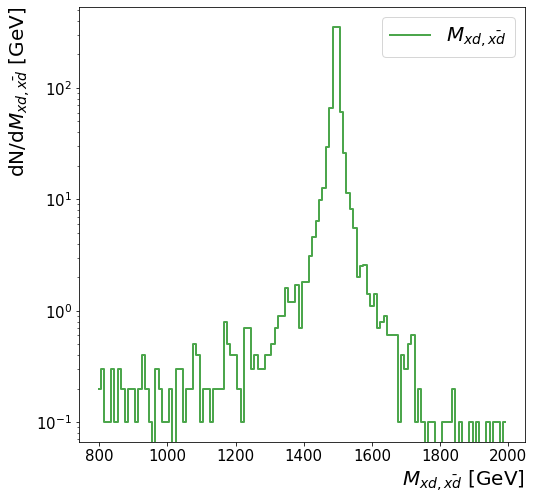

In [56]:
plt.figure(figsize=(8,8)) # plotsize

bin_size = np.linspace(800,2000,121)
hist, bins = np.histogram(m, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/10,color = "green", where='mid',linewidth=2, alpha=0.7,label="$M_{xd,\\bar{xd}}$") 

plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=20) # plot label tag
plt.yscale('log') 
plt.xlabel("$M_{xd,\\bar{xd}}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("dN/d$M_{xd,\\bar{xd}}$", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()